# 1. 말뭉치, 토큰, 타입
- 말뭉치 : 텍스트 데이터 (원시 텍스트 + 메타 데이터)
- 원시 데이터(데이터셋) : 문자 시퀀스이지만 문자를 '토큰(공백문자/구두점으로 구분되는 단어)'이라는 연속된 단위로 묶었을 때 유용
- 메타 데이터(샘플/데이터포인트) : 식별자, 레이블, 타임스탬프 등 텍스트와 관련된 부가정보
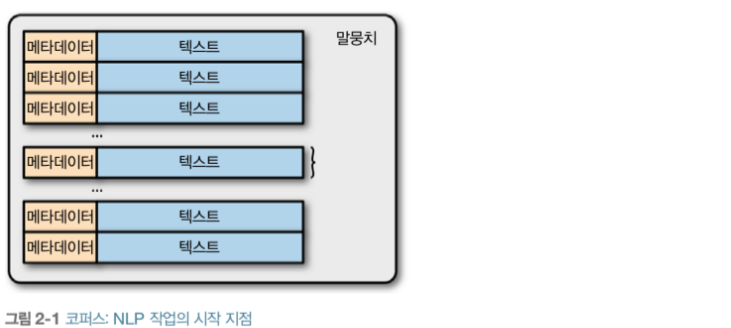
- 토큰화 : 텍스트를 토큰으로 나누는 과정
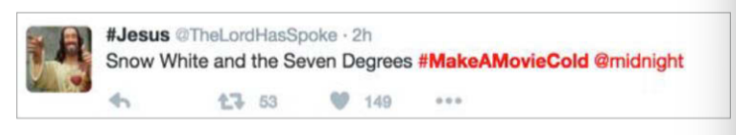
- 트윗을 토큰화하려면 해시태그, 멘션, 스마일리 이모지, URL을 하나의 단위로 인식해야 함 -> 오픈소스 NLP 패키지가 기본적인 토큰화 제공하여 전처리 작업 덜어줌




In [8]:
import spacy
nlp = spacy.load('en_core_web_sm')
text = "Mary, don't slap the green witch"
print([str(token) for token in nlp(text)])

# ['Mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']

from nltk.tokenize import TweetTokenizer
tweet = u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:-)"
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

# ['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':-)']

['Mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']
['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':-)']


- 타입 : 말뭉치에 등장하는 고유한 토큰
- 어휘사전/어휘 : 말뭉치에 있는 모든 타입의 집합
- 단어 = 내용어 + 불용어(관사/전치사 등 문법적 용도)

# 2. 유니그램, 바이그램, 트라이그램, .. n-그램
- n-그램 : 텍스트에 있는 고정길이(n)의 연속된 토큰 시퀀스
- 바이그램 : 토큰 2개
- 유니그램 : 토큰 1개
- spaCy나 NLTK 패키지에서도 n-그램 도구 제공

In [11]:
def n_grams(text, n):
  '''
  text나 token 넣으면 n-gram 리스트 반환
  '''

  return [text[i:i+n] for i in range(len(text) - n+1)]

cleaned = ['Mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']
print(n_grams(cleaned, 3))

[['Mary', ',', 'do'], [',', 'do', "n't"], ['do', "n't", 'slap'], ["n't", 'slap', 'the'], ['slap', 'the', 'green'], ['the', 'green', 'witch']]


- 부분단어가 유용한 정보를 전달한다면 문자 n-그램을 생성할 수 있음
- ex) methanol 접미사 ol은 알코올의 종류를 나타냄 -> 유기화합물 이름 구분 작업에서는 n-그램으로 찾은 부분단어의 정보가 유용 -> 모든 문자의 n-그램을 토큰 하나로 취급

# 3. 표제어와 어간
- 표제어(lemma) : 단어의 기본형
- ex) fly(표제어) : flies flown flow flew 등등
- 표제어 추출 : 토큰을 표제어로 바꾸어 벡터 표현의 차원을 줄임

In [13]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp("he was running late")
for token in doc:
  print('{} --> {}'.format(token, token.lemma_))

# he --> he
# was --> be
# running --> run
# late --> late


he --> he
was --> be
running --> run
late --> late


# 4. 문장과 문서 분류하기
- TF-IDF 표현이 문서/문장같은 긴 텍스트 뭉치 분류하는데에 유용 (지도학습)

# 5. 단어 분류하기 : 품사 태깅
- 문서에 레이블 할당 확장 --> 단어나 토큰에 레이블 할당하는 개념
- 단어 분류 작업 ex) 품사(pos) 태깅

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp("Mary slapped the green witch.")
for token in doc:
  print('{} - {}'.format(token, token.pos_))

# Mary - PROPN
# slapped - VERB
# the - DET
# green - ADJ
# witch - NOUN
# . - PUNCT

Mary - PROPN
slapped - VERB
the - DET
green - ADJ
witch - NOUN
. - PUNCT


# 6. 청크 나누기와 개체명 인식
- 청크 나누기/부분 구문 분석 : 연속된 여러 토큰으로 구분되는 텍스트 구에 레이블을 할당
- 목적 : 명사/동사/형용사 등 문법 요소로 구성된 고차원의 단위 유도

In [18]:
# 명사구(NP - Noun Phase) 부분 구문 분석
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp("Mary slapped the green witch.")
for chunk in doc.noun_chunks:
  print('{} - {}'.format(chunk, chunk.label_))

# Mary - NP
# the green witch - NP

Mary - NP
the green witch - NP


- 개체명(실제 세상의 개념) 인식
- ex) 사람, 장소, 회사, 약 이름 등
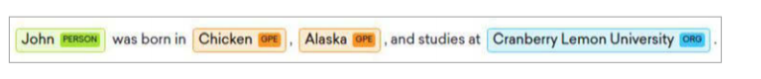

# 7. 문장 구조
- 구문 분석 : 구 사이의 관계를 파악 <---> 구 단위 식별(청크 나누기/ 부분구문분석)
- 구문 분석 트리 : 문장 안의 문법 요소가 계층적으로 어떻게 관련되는지 보여줌
- Ex1) 구성 구문 분석
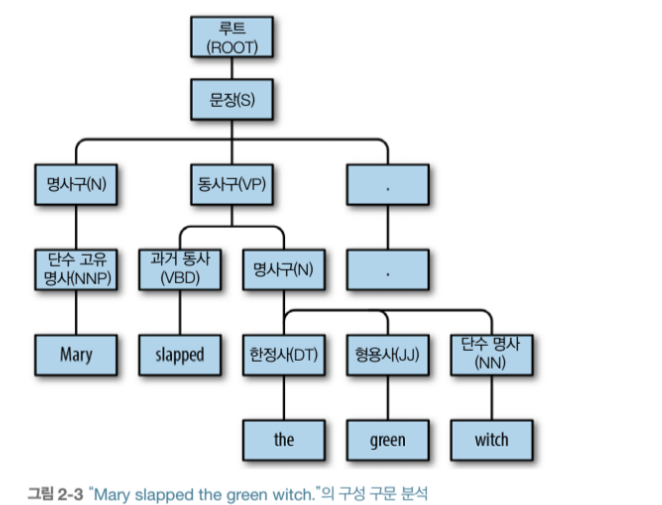
- Ex2) 의존 구문 분석
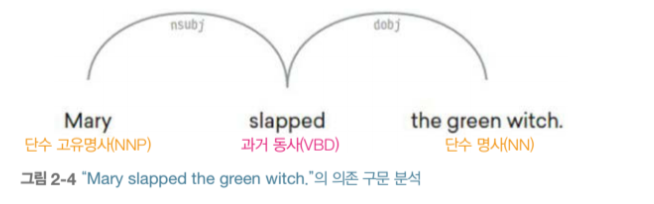

# 8. 단어 의미와 의미론
- 의미 : 단어가 나타내는 각각의 뜻, 단어에는 의미가 하나 이상 존재